# Project - Predicting census income dataset using classification algorithms

# Written By: Abera Tohye

# Table of Contents
 1. Introduction
 2. Data Description
 3. Methodology
 4. Prediction and Model Evaluation using Test set
 5. Discussion and Conclusion

# 1. Introduction
In this project the classification algorithms such as K Nearest Neighbor(KNN), Decision Tree, Support Vector Machine and Logistic Regression are implemented, and the best classifier will be chosen for this specific dataset based on accuracy evaluation methods. The dataset available in the UCI Machine learning repository is extracted from the US census database. Demographic characteristics; age, sex, marital status and socio-economic characteristics of the population; education, income, capital gain, capital loss, occupation and race were included. The education attribute contains values that were used to define primary, secondary or postgraduate education. The race attribute contains racial or ethnicity nature. The variable Occupation contains employment-related values such as Exec-managerial, Handlers-cleaners, Adm-clerical. The socioeconomic factors play an important role in assessing an individuals economic and sociological standing. Socioeconomic status has been a powerful determinant of health; as a general rule, wealthy people tend to be in better health than people of poorer status. People with relatively few resources may not have very good access to care services, or even transportation to get health care. They may not have the time to focus on their health, or sufficient education to realize the impact that certain elements have on their health. Social and economic disadvantage experienced by a woman throughout her lifetime increases her risk of having a fetus with birth defect. Socioeconomic status is considered to be a major social basis for inequalities and an important predictor of health at all ages. Socioeconomically disadvantaged men and women have higher overall mortality rates than persons with a higher socioeconomic status. Death rates due to cardiovascular disease and cancer, causes related to smoking, causes related to alcohol use as well as poorer self-assessments of health, are substantially higher in groups of lower socioeconomic status.

Such inequalities in health care might be reduced by improving educational opportunities, income distribution, health-related behaviour and access to health care. Policies related to preventive social, economic and behavioural interventions in areas such as poverty and income, education, unemployment, housing, transportation, the environment (including pollution) and nutrition may well have a much greater effect on reducing health disparities.  

There are three broad theories of how socioeconomic status might relate to health. The materialist theory states that gradients in income and wealth are associated with varying levels of deprivation, which in turn affects health status as those with fewer means have inferior access to health care and the necessities of life. Another view is that education influences health through lifestyle and health-related behaviors such as diet, substance use, and smoking. A third theory sees social status (often measured by occupation) and personal autonomy as key influences on health, particularly through the stresses that accompany low social status and low autonomy. 

Thus, studying the census income dataset help policy makers to formulate policies on health related matters, on education and intervention policy on various social issues. The objective of the study is to predict whether an individual’s income will be greater than $50k per year by considering several attributes from the census data.


# 2. Data Description  
The dataset is about Census Income and consists of annual income of individuals. It also consists of demographic information such as a person’s age, gender and marital status as well as socioeconomic factors. The data set includes details of 14 attributes and 32560 records whose income are greater than 50k per year in US dollars or less, the target variable income is categorical and has two labels. The dataset doesn't contain header row, so the list of column names to use is passed explicitly. The dataset used which is publicly available can be downloaded from the UCI Machine Learning Repository[https://archive.ics.uci.edu/ml/datasets/Census+Income] and loaded using Pandas library. The goal of this project is to predict whether a new individuals income exceeds 50k a year by applying classification algorithms such as K Nearest Neighbor(KNN), Decision Tree, Support Vector Machine and Logistic Regression, and find the best model for this specific dataset by using accuracy evaluation methods. The 14 attributes presented in the dataset with their associated descriptions are as follows:  

age: continuous.    
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov      
fnlwgt: continuous, sampling weight.   
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th   
education-num: continuous.    
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed     
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty,etc…    
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.    
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.    
sex: Female, Male.    
capital-gain: continuous,income from investment sources, apart from wages/salary.  
capital-loss: continuous, losses from investment sources, apart from wages/salary.   
hours-per-week: continuous.    
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, etc..    
Target variable (Income): >50K, <=50K.     

<h2>Reading the data set and adding the related headers.</h2>
 Python list <b>headers</b> containing name of headers 

In [1]:
headers = ["Age","workclass","fnlwgt","education","education-num", "marital-status","occupation",
         "relationship","race","Gender", "capital-gain","capital-loss","hours-per-week","native-country","Income"]


In [2]:
# Setup
#Before we get the data and start exploring it, let's download all the libraries that we will need.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [3]:
df = pd.read_excel(r"C:\Users\abera\Desktop\project\section_3\census_income_dataset.xlsx", names = headers)
# To see what the data set looks like, we'll use the head() method to display the first five rows of the dataframe.
df.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# 3. Methodology

# 3.1 Exploratory Data Analysis (EDA)
In this report, an exploratory data analysis was performed to obtain some useful insights in the structure of the dataset: descriptive statistics, relationships, the correlation between continous variables as well as graphical displays such as bar graph, scatter plot and histograms were considered. Furhermore, before utilizing the classification algorithms the dataset was pre-processed. 


In [4]:
df.shape

(32560, 15)

In [5]:
df[['Age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].describe()

,Age,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,10.080590,1077.615172,87.306511,40.437469
std,13.640642,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
Age               32560 non-null int64
workclass         32560 non-null object
fnlwgt            32560 non-null int64
education         32560 non-null object
education-num     32560 non-null int64
marital-status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
Gender            32560 non-null object
capital-gain      32560 non-null int64
capital-loss      32560 non-null int64
hours-per-week    32560 non-null int64
native-country    32560 non-null object
Income            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.columns

Index(['Age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'Gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

Let’s see how many of each income category is in our data set

In [8]:
df['Income'].value_counts()


 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

### Data visualization 

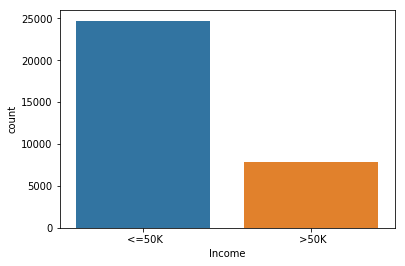

In [9]:
# Count of >50K & <=50K
sns.countplot(df['Income'],label="Count")
plt.show()

24719 people earn less than or eaqual to 50k anually while 7841 earn greater than 50k in us dollars.  

### Scatter plot of Capital gain versus educational level
We can show the distribution of Capital gain versus educational level using a scatter plot; the Y-axis indicates Capital gain and the X-axis shows the educational level. A scatter plot is a useful method of comparing the relationship between two variables. There seems to be no pattern between these two variables and hence these variables are not related. 

Text(0, 0.5, 'Capital gain')

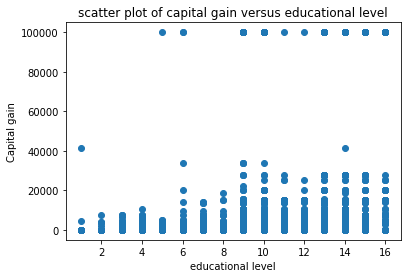

In [10]:
plt.scatter(df["education-num"], df["capital-gain"])
plt.title("scatter plot of capital gain versus educational level")
plt.xlabel("educational level")
plt.ylabel("Capital gain")

### The correlation matrix in order to see if the independent variables are correlated to each other. The independent variables(features) must be independent (to avoid multicollinearity).

In [11]:
df[['Age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].corr()

,Age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
education-num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
capital-gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
capital-loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
hours-per-week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


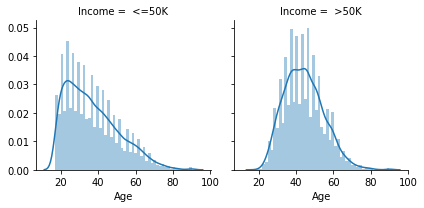

In [12]:
# Explore Age vs Income
g = sns.FacetGrid(df, col='Income')
g = g.map(sns.distplot, "Age")
plt.show()

The distribution of age depends on the category of the income, thus age can be a good predictor of income.

In [13]:
df[['Age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'Income']].groupby('Income').mean()

,Age,education-num,capital-gain,capital-loss,hours-per-week
Income,,,,,
<=50K,36.783648,9.594927,148.670537,53.145071,38.840163
>50K,44.249841,11.611657,4006.142456,195.001530,45.473026


Observations:

  - The average age of individuals who make more than 50k is higher than those who make less than or equal to 50k.
  - The average level of education is higher for people who earn more than 50k a year, the higher the educational status the higher the income.
  - The capital-gain is higher for people who make more than 50k.
  - The capital-loss is higher for people who make more than 50k.
  - The hours-per-week is higher for people who make more than 50k, meaning the more we increase the number of working hourse the higher the income.

In [14]:
# Checking if dataset has missing values
df.isnull().sum()


Age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
Gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [15]:
df.groupby(['Gender'])['Income'].value_counts(normalize=True)

Gender   Income
 Female   <=50K    0.890539
          >50K     0.109461
 Male     <=50K    0.694249
          >50K     0.305751
Name: Income, dtype: float64

89 % of female earn under 50k while only 69 % of males earn bellow 50k anually. Conversely around 30 percent of males earn more than 50k but only 10 percent of females earn above 50k anually.



## Pre-processing: Feature selection/extraction

### Convert Categorical features to numerical values

Lets look at the variable Gender:  

Converting male to 0 and female to 1

In [16]:
df['gender'] = np.where(df['Gender'].str.contains('Female'), 1, 0)


In [17]:
df = df.drop(['Gender'], axis=1)
df.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,Income,gender
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K,1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,40,United-States,<=50K,1


Lets convert <=50k to 0 and >50k to 1:


In [18]:
df['income'] = np.where(df['Income'].str.contains('>50K'), 1, 0)


In [19]:
df = df.drop(['Income'], axis=1)
df.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,gender,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,0,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,0,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,0,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,1,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,40,United-States,1,0


## One Hot Encoding  
### How about race?

In [20]:
df.groupby(['race'])['income'].value_counts(normalize=True)


race                 income
 Amer-Indian-Eskimo  0         0.884244
                     1         0.115756
 Asian-Pac-Islander  0         0.734360
                     1         0.265640
 Black               0         0.876120
                     1         0.123880
 Other               0         0.907749
                     1         0.092251
 White               0         0.744131
                     1         0.255869
Name: income, dtype: float64

### Feature before One Hot Encoding

In [21]:
df[['Age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','gender','race']].head()


,Age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,gender,race
0,50,83311,13,0,0,13,0,White
1,38,215646,9,0,0,40,0,White
2,53,234721,7,0,0,40,0,Black
3,28,338409,13,0,0,40,1,Black
4,37,284582,14,0,0,40,1,White


### Use one hot encoding technique to convert categorical variables to binary variables and append them to the feature Data Frame

In [22]:
Feature = df[['Age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','gender']]
Feature = pd.concat([Feature,pd.get_dummies(df['race'])], axis=1)
Feature.head()


,Age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,gender,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,50,83311,13,0,0,13,0,0,0,0,0,1
1,38,215646,9,0,0,40,0,0,0,0,0,1
2,53,234721,7,0,0,40,0,0,0,1,0,0
3,28,338409,13,0,0,40,1,0,0,1,0,0
4,37,284582,14,0,0,40,1,0,0,0,0,1


### Feature selection
#### Lets define feature sets, X:

In [23]:
X = Feature
X[0:5]

,Age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,gender,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,50,83311,13,0,0,13,0,0,0,0,0,1
1,38,215646,9,0,0,40,0,0,0,0,0,1
2,53,234721,7,0,0,40,0,0,0,1,0,0
3,28,338409,13,0,0,40,1,0,0,1,0,0
4,37,284582,14,0,0,40,1,0,0,0,0,1


## The lables

In [24]:
y = df['income'].values
y[0:20]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

## Normalize Data
#### Data Standardization give data zero mean and unit variance.

In [25]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

C:\Users\abera\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abera\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 0.83709708, -1.0087417 ,  1.13477863, -0.14591373, -0.21666301,
        -2.22212013, -0.70308748, -0.09820239, -0.18155482, -0.32577377,
        -0.09161305,  0.41302713],
       [-0.04264043,  0.24504633, -0.42002663, -0.14591373, -0.21666301,
        -0.03542999, -0.70308748, -0.09820239, -0.18155482, -0.32577377,
        -0.09161305,  0.41302713],
       [ 1.05703146,  0.42576955, -1.19742926, -0.14591373, -0.21666301,
        -0.03542999, -0.70308748, -0.09820239, -0.18155482,  3.06961483,
        -0.09161305, -2.42114848],
       [-0.77575502,  1.40814589,  1.13477863, -0.14591373, -0.21666301,
        -0.03542999,  1.42229812, -0.09820239, -0.18155482,  3.06961483,
        -0.09161305, -2.42114848],
       [-0.11595189,  0.89817009,  1.52347994, -0.14591373, -0.21666301,
        -0.03542999,  1.42229812, -0.09820239, -0.18155482, -0.32577377,
        -0.09161305,  0.41302713]])

## Implementing the model


In [26]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.469036
         Iterations: 35


C:\Users\abera\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.150     
Dependent Variable:  y                AIC:              30565.5936
Date:                2019-11-21 08:09 BIC:              30657.8928
No. Observations:    32560            Log-Likelihood:   -15272.   
Df Model:            10               LL-Null:          -17974.   
Df Residuals:        32549            LLR p-value:      0.0000    
Converged:           0.0000           Scale:            1.0000    
No. Iterations:      35.0000                                      
------------------------------------------------------------------
     Coef.    Std.Err.     z     P>|z|      [0.025       0.975]   
------------------------------------------------------------------
x1   0.4134      0.0148  28.0235 0.0000        0.3845       0.4423
x2   0.0458      0.0144   3.1885 0.0014        0.0176       0.0739
x3   0.6889      0.0158  43.5361 0.0000        0.6579       0.7199
x4   7.6402      0.10

** The p-values for most of the variables are smaller than 0.05, except five variables, therefore, we will remove them.

In [27]:
X = Feature
X = X[['Age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','gender']]
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

C:\Users\abera\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abera\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ 0.83709708, -1.0087417 ,  1.13477863, -0.14591373, -0.21666301,
        -2.22212013, -0.70308748],
       [-0.04264043,  0.24504633, -0.42002663, -0.14591373, -0.21666301,
        -0.03542999, -0.70308748],
       [ 1.05703146,  0.42576955, -1.19742926, -0.14591373, -0.21666301,
        -0.03542999, -0.70308748],
       [-0.77575502,  1.40814589,  1.13477863, -0.14591373, -0.21666301,
        -0.03542999,  1.42229812],
       [-0.11595189,  0.89817009,  1.52347994, -0.14591373, -0.21666301,
        -0.03542999,  1.42229812]])

In [28]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.469780
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.149     
Dependent Variable: y                AIC:              30606.0787
Date:               2019-11-21 08:13 BIC:              30664.8146
No. Observations:   32560            Log-Likelihood:   -15296.   
Df Model:           6                LL-Null:          -17974.   
Df Residuals:       32553            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1        0.4166     0.0148    28.2391   0.0000    0.3877    0.4455
x2        0.0386     0.0142     2.7202   0.0065    0.0108 

The resulting model shows how age, finalweight, education-num, capital-gain, capital-loss, hours-per-week and gender affect income of an individual.   

# 3.2 Methodology - Classification 


Now let us use the training set to build an accurate model. Then use the test set to report the accuracy of the model we should use the following algorithm:  

- K-Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
       

# 3.2.1 K-Nearest Neighbor(KNN)
Notice: we should find the best k to build the model with the best accuracy. We can split the dataset into train and test to find the best k.

### Train Test Split
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has not been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, we train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (26048, 7) (26048,)
Test set: (6512, 7) (6512,)


### Import library
Classifier implementing the k-nearest neighbors vote.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K? The general solution is to reserve a part of our data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in the test set. Repeat this process, increasing the k, and see which k is the best for the model.  
  
We can calculate the accuracy of KNN for different Ks.

In [31]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.76796683, 0.80727887, 0.7972973 , 0.81633907, 0.81280713,
       0.82079238, 0.8161855 , 0.82309582, 0.82186732])

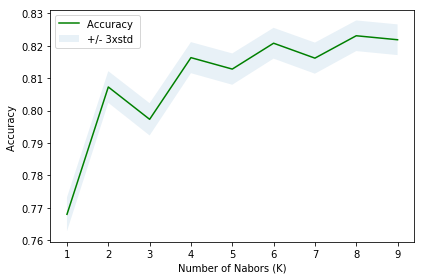

In [32]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [33]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)


The best accuracy was with 0.8230958230958231 with k= 8


## Training  
The KNN algorithm with k=8:

In [34]:
k = 8
#Train Model  
neigh = KNeighborsClassifier(n_neighbors = 8).fit(X,y)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

# 3.2.2 Decision Tree
We use the training part of the dataset to build a decision tree and then use it to predict the class of unknown individual.

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
IncomeTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
IncomeTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Training

In [37]:
IncomeTree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# 3.2.3 Support Vector Machine
The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:  
  
    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid  
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Therefore, the function linear is used for this particular dataset as the result is better compared to others.

In [38]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


# 3.2.4 Logistic Regression  
Some features for the modeling are selected. Also we changed the target data type to be integer, as it is a requirement by the Scikit learn algorithm.

In [39]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,y)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

# 4. Model Evaluation using Test set

In [40]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

## 4.1.1 Predicting KNN  
we can use the model to predict the test set:

In [41]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 1, 0, 0])

## 4.1.2 Accuracy evaluation  
In multilabel classification, accuracy_score is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [42]:
print("Test set Accuracy: ", jaccard_similarity_score(y_test, yhat))


Test set Accuracy:  0.8536547911547911


In [43]:
print("f1 score: ", f1_score(y_test, yhat, average='weighted'))

f1 score:  0.8407837587110284


## 4.2.1 Predicting Decision Tree
Let's make some predictions on the testing dataset and store it into a variable called predTree.

In [44]:
predTree = IncomeTree.predict(X_test)


We can print out predTree and y_test if we want to visually compare the prediction to the actual values.


In [45]:
print (predTree [0:20])
print (y_test [0:20])

[0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1]
[0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0]


## 4.2.2 Decision Tree Evaluation
Next, let's check the accuracy of our model.

In [46]:
print("Jaccard accuracy index", jaccard_similarity_score(y_test, predTree))

Jaccard accuracy index 0.820485257985258


In [47]:
f1_score(y_test, predTree, average='weighted')


0.8110387937199394

## 4.3.1 Predicting SVM
After being fitted, the model can then be used to predict new values:

In [48]:
yhat_svm = clf.predict(X_test)
yhat_svm [0:5]

array([0, 0, 0, 0, 0])

## 4.3.2 SVM Evaluation
We can also easily use the f1_score from sklearn library:

In [49]:
f1_score(y_test, yhat_svm, average='weighted')

0.7757898051237203

Lets try jaccard index for accuracy:


In [50]:
jaccard_similarity_score(y_test, yhat_svm)

0.8115786240786241

## 4.4.1 Predicting Logistic Regression

In [51]:
Yhat_L = LR.predict(X_test)
Yhat_L

array([0, 0, 1, ..., 0, 0, 0])

predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X): 

In [52]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.95713646, 0.04286354],
       [0.90881337, 0.09118663],
       [0.20302068, 0.79697932],
       ...,
       [0.68902909, 0.31097091],
       [0.84058982, 0.15941018],
       [0.96930127, 0.03069873]])

## 4.4.2 Logistic Regression Evaluation  
#### jaccard index
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [53]:
jaccard_similarity_score(y_test, Yhat_L)

0.8203316953316954

## F1 Score

In [54]:
# We can also easily use the f1_score from sklearn library:
f1_score(y_test, Yhat_L, average='weighted')


0.8030960894406097

* The f1-score reaches its best value at 1 and worst score at 0.
* And finally we can tell the average accuracy for this classifier is 80%.

## log loss
Now, lets try log loss for evaluation. In logistic regression, the output can be the probability of income equal to 1. This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [55]:
log_loss(y_test, yhat_prob)

0.39051388669013826

## 5. Conclusion:
Based on the above accuracy evaluation methods for this specific dataset, KNN algorithm is found to be the best one as it has the highest Jaccard index (Jaccard index=0.85365). The higher the Jaccard index means the better the predicted labels for a sample match with the true set of labels. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

## Future work:
There are many types of classification algorithms. Other types of algorithms will be covered later.
